In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

### 1. CHARGEMENT ET APERÇU DES DONNÉES

In [3]:
# Charger les données
df = pd.read_csv('archive/US_Accidents_March23.csv')

In [4]:
print(f"\n📊 Dimensions du dataset: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"💾 Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 Dimensions du dataset: 7,728,394 lignes × 46 colonnes
💾 Taille mémoire: 10870.28 MB


In [5]:
print("Premières lignes du dataset:")

df.head()

Premières lignes du dataset:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
print("Informations sur les colonnes:")

print(df.info())

Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          

In [ ]:
# (Cell left intentionally blank for spacing)

### 2. EXPLORATION DES VARIABLES CLÉS
Nous réalisons ici un EDA de base: statistiques, valeurs manquantes, distribution de la `Severity`, analyses temporelles et géographiques.

In [6]:
# Vue d'ensemble: types, valeurs manquantes et statistiques
print('--- Types de colonnes ---')
print(df.dtypes.value_counts())

print('--- Nombre de valeurs uniques par colonne (top 10) ---')
print(df.nunique().sort_values(ascending=False).head(10))

print('--- Statistiques (numériques) ---')
display(df.describe().T)

# Valeurs manquantes (%) par colonne
missing = df.isnull().mean() * 100
display(missing.sort_values(ascending=False).head(30))

--- Types de colonnes ---
object     20
bool       13
float64    12
int64       1
Name: count, dtype: int64
--- Nombre de valeurs uniques par colonne (top 10) ---
ID                   7728394
End_Time             6705355
Start_Time           6131796
Description          3761578
Start_Lng            2482533
Start_Lat            2428358
End_Lng              1605789
End_Lat              1568172
Weather_Timestamp     941331
Zipcode               825094
dtype: int64
--- Statistiques (numériques) ---


,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

In [7]:
# Parser les dates et extraire features temporelles si présentes
for col in ['Start_Time','End_Time', 'Weather_Timestamp']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

if 'Start_Time' in df.columns:
    df['Start_Hour'] = df['Start_Time'].dt.hour
    df['Start_DayOfWeek'] = df['Start_Time'].dt.day_name()
    df['Start_Month'] = df['Start_Time'].dt.month_name()
    print('Datetime parsed: Start_Time available — extracted Hour/DayOfWeek/Month')
else:
    print('Start_Time column not found; skipping datetime feature extraction')

Datetime parsed: Start_Time available — extracted Hour/DayOfWeek/Month


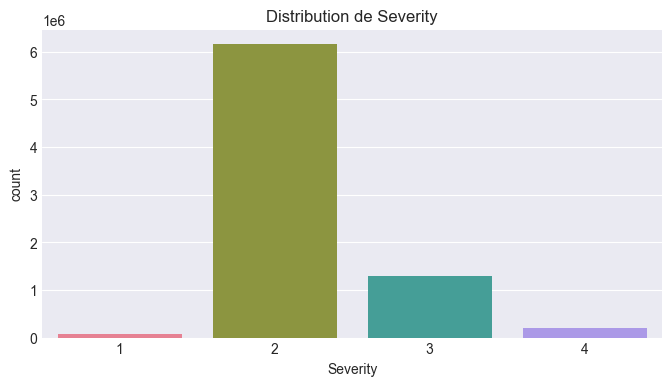

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64


In [8]:
# Distribution de la variable cible `Severity`
if 'Severity' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='Severity', palette='husl')
    plt.title('Distribution de Severity')
    plt.show()
    print(df['Severity'].value_counts())
else:
    print('Colonne Severity introuvable')

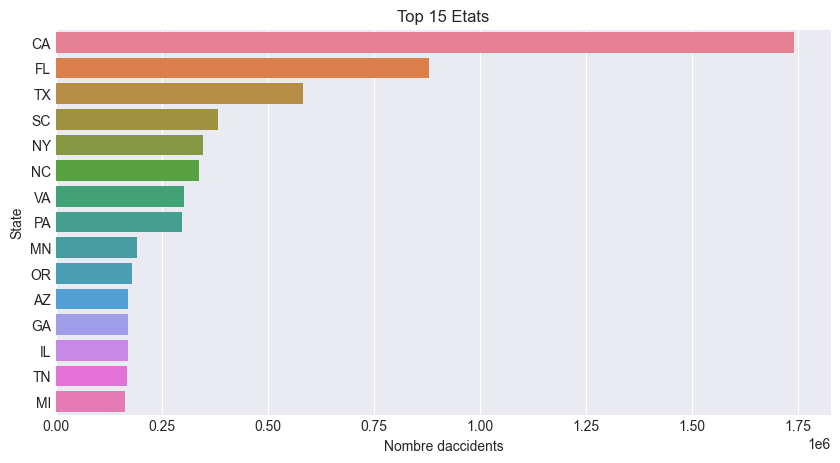

In [9]:
# Top États avec le plus d'accidents
if 'State' in df.columns:
    top_states = df['State'].value_counts().head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_states.values, y=top_states.index, palette='husl')
    plt.xlabel('Nombre daccidents')
    plt.title('Top 15 Etats')
    plt.show()
else:
    print('Colonne State introuvable')

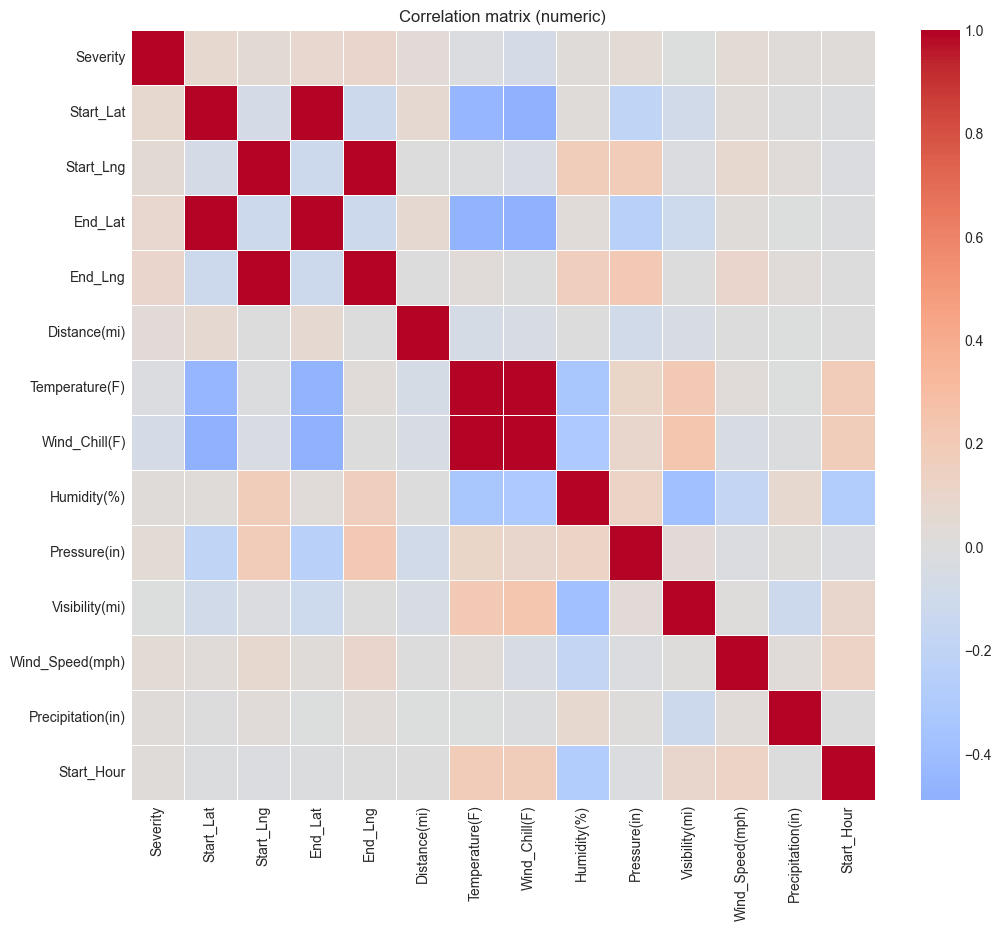

In [10]:
# Corrélations numériques (heatmap) — réduire les colonnes pour lisibilité
num = df.select_dtypes(include=[np.number])
if num.shape[1] > 1:
    corr = num.corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5)
    plt.title('Correlation matrix (numeric)')
    plt.show()
else:
    print('Pas assez de colonnes numériques pour une matrice de corrélation')

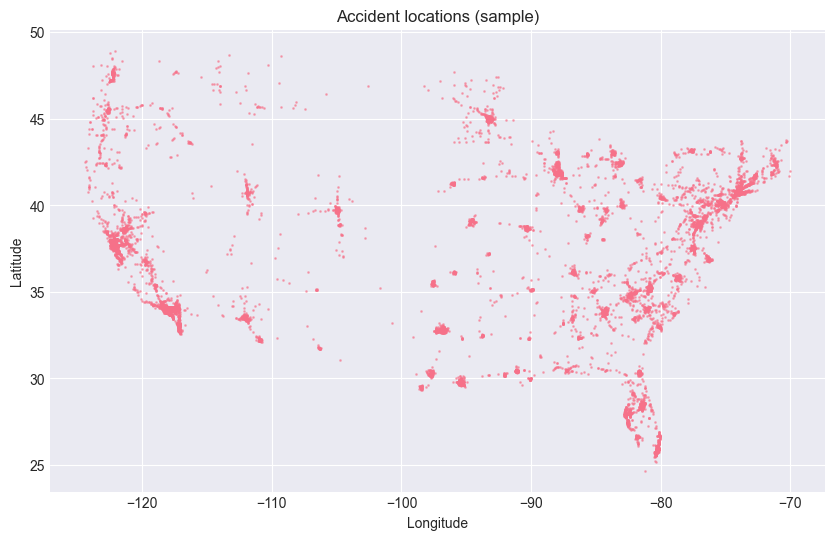

In [11]:
# Visualisation géographique rapide (nuage de points) — échantillonner pour performance
if set(['Start_Lat','Start_Lng']).issubset(df.columns):
    sample = df.dropna(subset=['Start_Lat','Start_Lng']).sample(min(10000, len(df)), random_state=42)
    plt.figure(figsize=(10,6))
    plt.scatter(sample['Start_Lng'], sample['Start_Lat'], s=1, alpha=0.5)
    plt.title('Accident locations (sample)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print('Colonnes Start_Lat/Start_Lng manquantes; impossible de tracer la carte')

In [12]:
# Sauvegarder un échantillon nettoyé pour analyses futures
out_path = 'archive/US_Accidents_sample_for_eda.csv'
subset = df.sample(min(200000, len(df)), random_state=42) if len(df) > 200000 else df.copy()
subset.to_csv(out_path, index=False)
print(f'Saved sample to {out_path}')

Saved sample to archive/US_Accidents_sample_for_eda.csv


### 3. ANALYSES APPROFONDIES
Les cellules suivantes effectuent des analyses plus poussées : séries temporelles, heatmaps horaires, relations `Severity` vs variables numériques/catégorielles, météo et caractéristiques de la route. Exécutez-les séquentiellement.

Counts by Severity


Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64

Percentages:


Severity
1     0.87
2    79.67
3    16.81
4     2.65
Name: count, dtype: float64

Severity,1,2,3,4
State,,,,
CA,10284,1445833,271814,13502
FL,7083,755895,104065,13149
TX,4233,450952,120443,7209
SC,6175,330817,42470,3095
NY,1247,265902,70062,10749
NC,5139,293066,29590,10404
VA,3115,230660,51324,18202
PA,1731,247991,31031,15867
MN,489,160848,29884,863


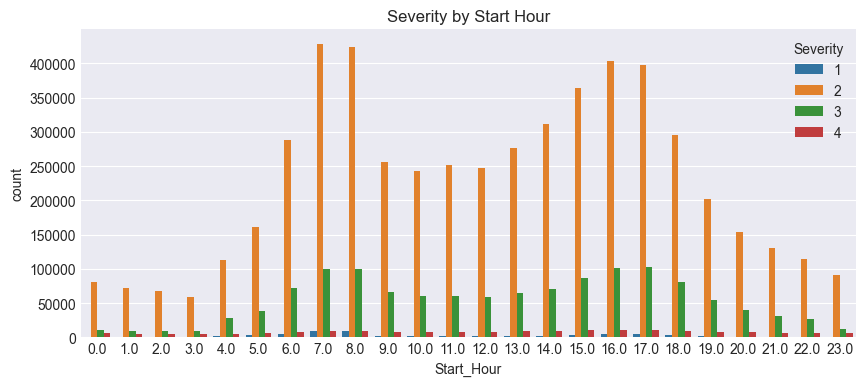

In [32]:
# Severity: proportions, severity by state and by hour
if 'Severity' in df.columns:
    sev_counts = df['Severity'].value_counts().sort_index()
    print('Counts by Severity')
    display(sev_counts)
    print('Percentages:')
    display((sev_counts / len(df) * 100).round(2))

    # Severity by State (top 10 states)
    if 'State' in df.columns:
        s = df.groupby(['State','Severity']).size().unstack(fill_value=0)
        top_states = df['State'].value_counts().head(10).index
        display(s.loc[top_states])

    # Severity distribution by hour
    if 'Start_Hour' in df.columns:
        plt.figure(figsize=(10,4))
        sns.countplot(data=df, x='Start_Hour', hue='Severity', palette='tab10')
        plt.title('Severity by Start Hour')
        plt.legend(title='Severity')
        plt.show()
else:
    print('Severity column missing; skip severity analyses')

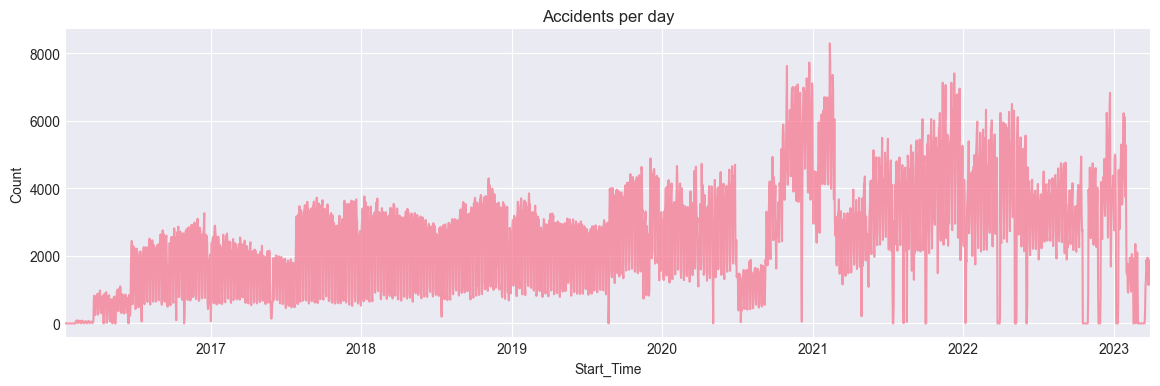

In [ ]:
# Time series: incidents per day and per month (requires Start_Time)
if 'Start_Time' in df.columns:
    ts = df.set_index('Start_Time').resample('D').size()
    plt.figure(figsize=(14,4))
    ts.plot(alpha=0.7)
    plt.title('Accidents per day')
    plt.ylabel('Count')
    plt.show()

    # Monthly
    ts_m = df.set_index('Start_Time').resample('M').size()
    plt.figure(figsize=(12,4))
    ts_m.plot(marker='o')
    plt.title('Accidents per month')
    plt.show()
else:
    print('Start_Time absent — impossible de faire les séries temporelles')

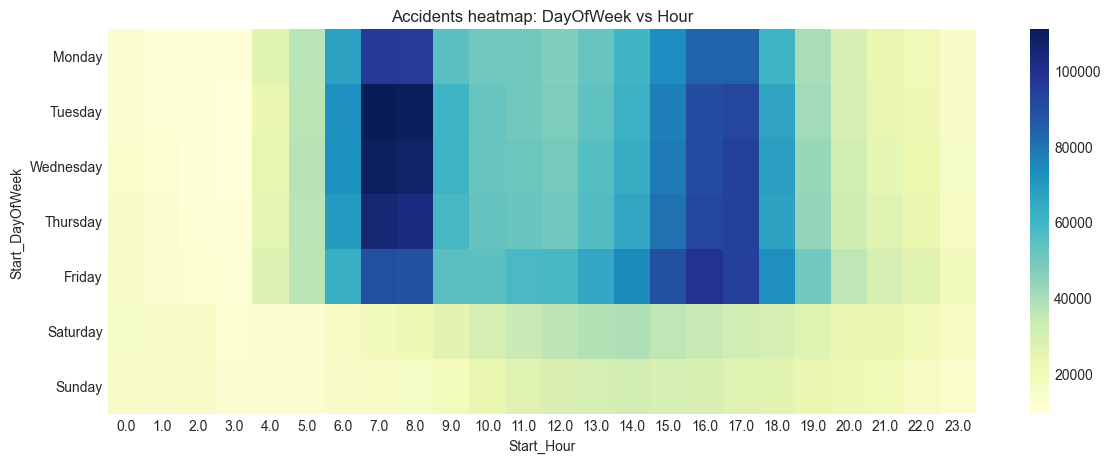

In [ ]:
# Hour x Weekday heatmap
if set(['Start_Hour','Start_DayOfWeek']).issubset(df.columns):
    pivot = df.pivot_table(index='Start_DayOfWeek', columns='Start_Hour', values='Severity', aggfunc='count').reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.figure(figsize=(14,5))
    sns.heatmap(pivot, cmap='YlGnBu')
    plt.title('Accidents heatmap: DayOfWeek vs Hour')
    plt.show()
else:
    print('Start_Hour/Start_DayOfWeek absent — skipping heatmap')

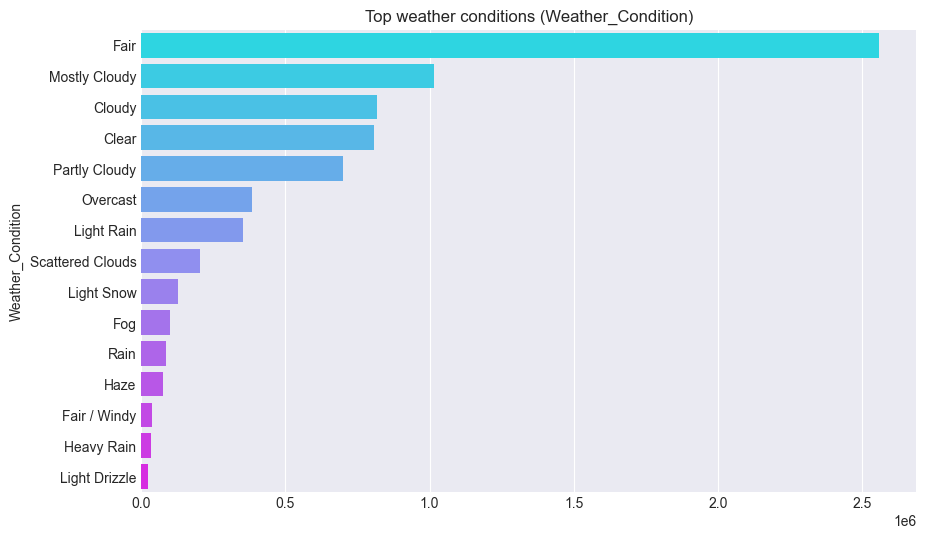

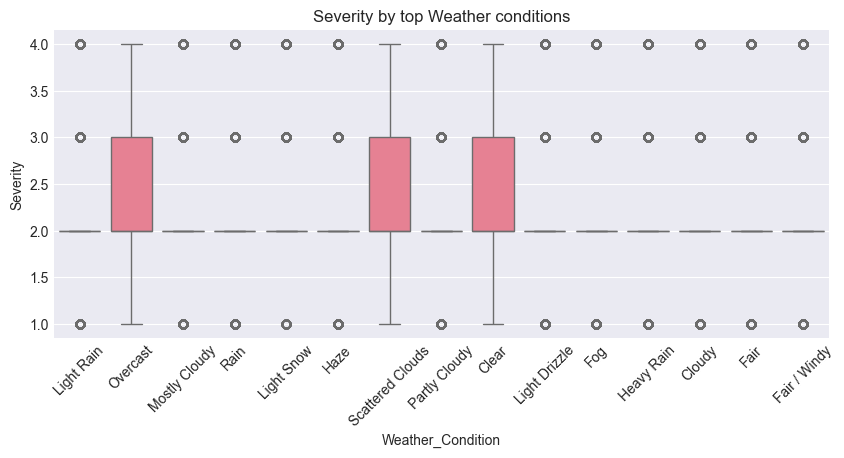

In [ ]:
# Weather analysis: top conditions and severity by weather
weather_cols = [c for c in ['Weather_Condition','Weather'] if c in df.columns]
if weather_cols:
    wc = weather_cols[0]
    top_wc = df[wc].value_counts().head(15)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_wc.values, y=top_wc.index, palette='cool')
    plt.title(f'Top weather conditions ({wc})')
    plt.show()

    if 'Severity' in df.columns:
        plt.figure(figsize=(10,4))
        sns.boxplot(x=wc, y='Severity', data=df[df[wc].notnull() & df['Severity'].notnull()].loc[df[wc].isin(top_wc.index)])
        plt.title('Severity by top Weather conditions')
        plt.xticks(rotation=45)
        plt.show()
else:
    print('Aucune colonne météo trouvée')

Traffic_Signal    1143772
Crossing           873763
Junction           571342
Stop               214371
Amenity             96334
Railway             66979
Give_Way            36582
Bump                 3514
Roundabout            249
Turning_Loop            0
dtype: int64

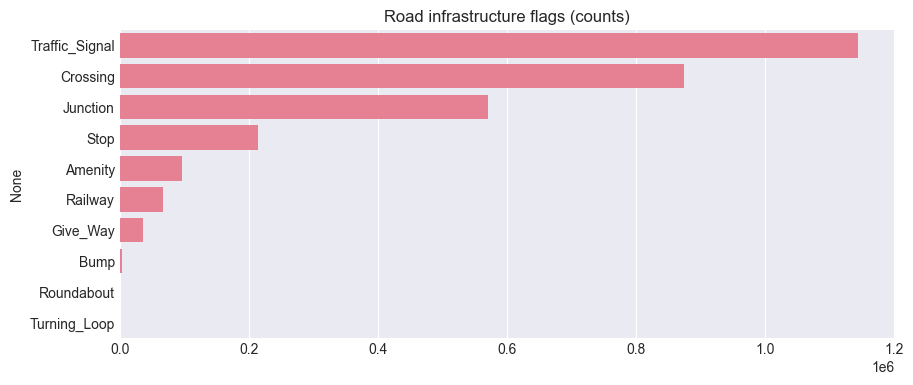

In [ ]:
# Road and infrastructure features — count True values for boolean flags if present
road_flags = [c for c in df.columns if c.lower() in ['amenity','bump','crossing','give_way','junction','railway','roundabout','stop','traffic_signal','turning_loop']]
if road_flags:
    counts = {c: df[c].sum() if df[c].dtype == 'bool' or set(df[c].dropna().unique()) <= {0,1} else df[c].value_counts().get(True,0) for c in road_flags}
    rd = pd.Series(counts).sort_values(ascending=False)
    display(rd)
    plt.figure(figsize=(10,4))
    sns.barplot(x=rd.values, y=rd.index)
    plt.title('Road infrastructure flags (counts)')
    plt.show()
else:
    print('Aucun drapeau dinfrastructure routière détecté')

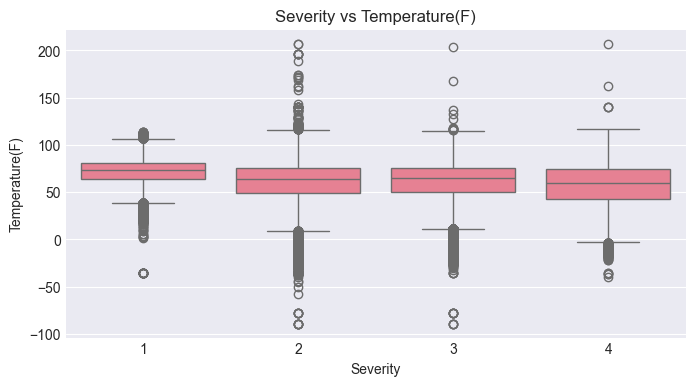

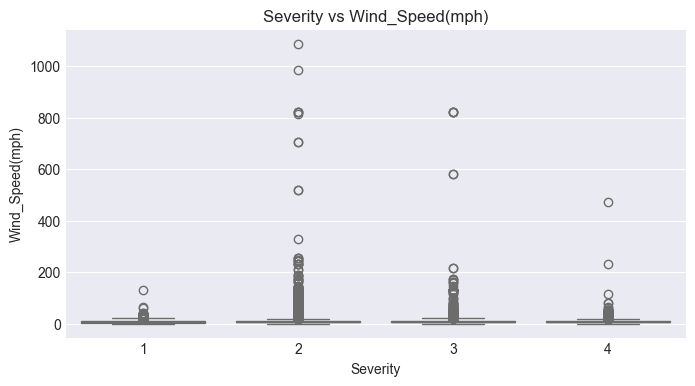

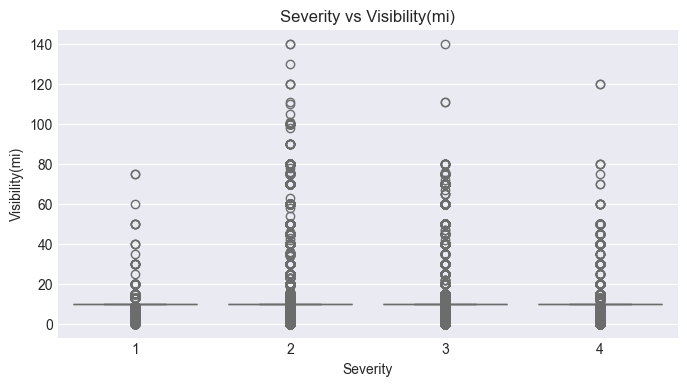

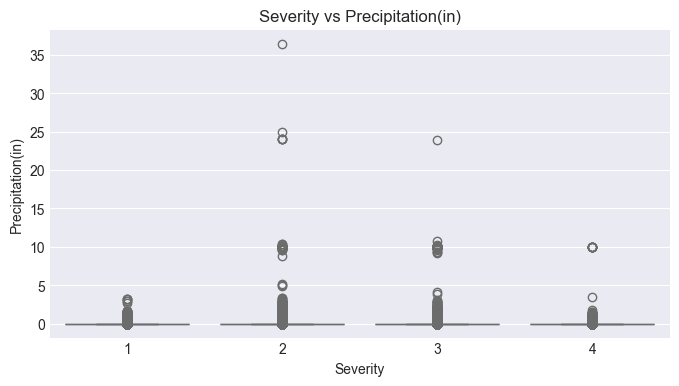

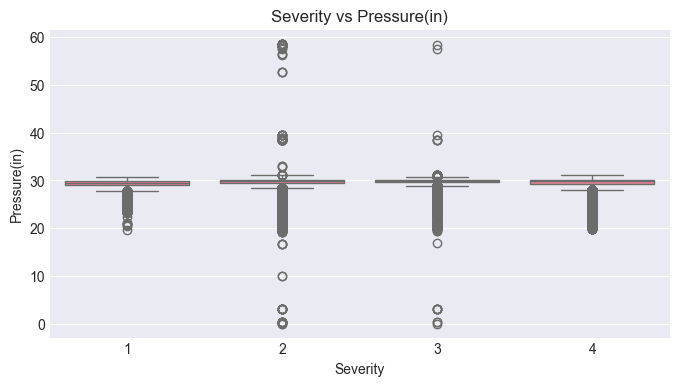

In [ ]:
# Relation Severity vs numeric features (boxplots) — choose a few common numeric cols
candidate_nums = ['Temperature(F)','Wind_Speed(mph)','Visibility(mi)','Precipitation(in)','Pressure(in)']
present = [c for c in candidate_nums if c in df.columns and df[c].notnull().any()]
if 'Severity' in df.columns and present:
    for c in present:
        plt.figure(figsize=(8,4))
        sns.boxplot(x='Severity', y=c, data=df[df[c].notnull() & df['Severity'].notnull()])
        plt.title(f'Severity vs {c}')
        plt.show()
else:
    print('Pas assez de colonnes numériques communes trouvées pour boxplots')

In [ ]:
# Top cities and streets — helpful for spatial focus
if 'City' in df.columns:
    display(df['City'].value_counts().head(20))
if 'Street' in df.columns:
    display(df['Street'].value_counts().head(20))

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

Street
I-95 N      78430
I-95 S      74528
I-5 N       71968
I-10 E      55572
I-10 W      53725
I-5 S       51781
I-80 W      39662
I-80 E      36113
I-405 N     32364
I-75 N      28166
I-75 S      27546
I-90 E      26426
I-15 N      24470
I-94 W      24003
I-90 W      23279
US-101 N    20041
I-95        20028
I-94 E      19940
I-70 E      19697
I-15 S      19230
Name: count, dtype: int64

In [ ]:
# Create a light cleaned dataset: select relevant columns and simple imputation
keep_cols = [c for c in ['ID','Severity','Start_Time','End_Time','Start_Lat','Start_Lng','State','City','Street','Weather_Condition','Temperature(F)','Visibility(mi)'] if c in df.columns]
clean = df[keep_cols].copy()
# simple imputation: numeric -> median, categorical -> 'Unknown'
for c in clean.select_dtypes(include=[np.number]).columns:
    clean[c] = clean[c].fillna(clean[c].median())
for c in clean.select_dtypes(include=['object','category']).columns:
    clean[c] = clean[c].fillna('Unknown')
clean_out = 'archive/US_Accidents_clean_sample.csv'
clean.sample(min(200000, len(clean)), random_state=42).to_csv(clean_out, index=False)
print(f'Cleaned sample saved to {clean_out}')

Cleaned sample saved to archive/US_Accidents_clean_sample.csv


---
Prochaine étape : exécutez les cellules ci-dessus pour générer les graphiques et vérifiez les colonnes manquantes. Dites-moi si vous voulez que j'ajoute :
- Analyse par gravité (Severity) détaillée,
- Séries temporelles (par jour/mois),
- Analyses par conditions météo/roadtype, ou
- Export d'un dataset nettoyé complet.